In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os,time
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

import sys
import pickle as pkl
sys.path.append("../Utils/")
from Detector import *
from Plot_Histogram import *

In [3]:
# Extract Simulation file:
Sim12 = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sample/Simulation/OscNext_Level7_v02.00_120000_pass2_variables_NoCut.pkl", "rb"))
Sim14 = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sample/Simulation/OscNext_Level7_v02.00_140000_pass2_variables_NoCut.pkl", "rb"))
Sim16 = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sample/Simulation/OscNext_Level7_v02.00_160000_pass2_variables_NoCut.pkl", "rb"))
Sim = [Sim12['120000'], Sim14['140000'], Sim16['160000']]

MCdict = dict()
for key in Sim12['120000'].keys():
    MCdict[key] = np.array([])
    for s in Sim:
        MCdict[key] = np.concatenate((MCdict[key], s[key]), axis=None) 

Cut = [ApplyCut(Sim12['120000']), ApplyCut(Sim14['140000']), ApplyCut(Sim16['160000'])]
MCcut = dict()
for key in Cut[0].keys():
    MCcut[key] = np.array([])
    for c in Cut:
        MCcut[key] = np.concatenate((MCcut[key], c[key]), axis=None) 


In [8]:

print(len(MCdict['true_Energy']))
print(len(MCcut['E_true']))


8131391
5801408


In [6]:
# mass: true binning depends on the DM mass
mass = 1000

# Binning:
# E true
Etrue_center = np.linspace(1., mass, 100)
Ewidth = (mass-1.)/(100.-1.)
Etrue_edges = [E - Ewidth/2. for E in Etrue_center]
Etrue_edges.append(Etrue_center[-1] + Ewidth/2.)
# Psi true
Psitrue_edges = np.linspace(0, 180, 51)
Psiwidth = 180./50.
Psitrue_center = np.array([Psitrue_edges[i]+Psiwidth/2. for i in range(len(Psitrue_edges)-1)])
# E reco
Ereco_edges = pow(10., np.linspace(np.log10(1.), np.log10(1e3), 50+1))
Ereco_center = np.array([np.sqrt(Ereco_edges[i]*Ereco_edges[i+1]) for i in range(len(Ereco_edges) - 1)])
# Psi reco
Psireco_edges = np.linspace(0., 180., 18+1)
Psireco_center = np.array( [(Psireco_edges[i]+Psireco_edges[i+1])/2. for i in range(len(Psireco_edges)-1)] )

# PID
PID_edges = np.array([0.,0.5,0.85,1.])
PID_center = np.array( [(PID_edges[i]+PID_edges[i+1])/2. for i in range(len(PID_edges)-1)] )

Bin = GroupBinning(Etrue_edges, Psitrue_edges, Etrue_center, Psitrue_center,
                Ereco_edges, Psireco_edges, Ereco_center, Psireco_center, PID_edges, PID_center)




In [10]:
outfile = "./PreComp/ResponseMatrix_mass_{}.pkl".format(mass)
Resp = MakeResponseMatrix(MCcut, Bin, outfile)

In [11]:
Resp.keys()
Resp['nu_e'].shape


(50, 100, 3, 18, 50)

/var/folders/v4/4lt7t62s39z5v7kv83wk_b440000gn/T/ipykernel_1898/2400341938.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_2DHist(h, np.array([Psitrue_edges, Psireco_edges]), "Psi true", "Psi reco", "psi resolution")


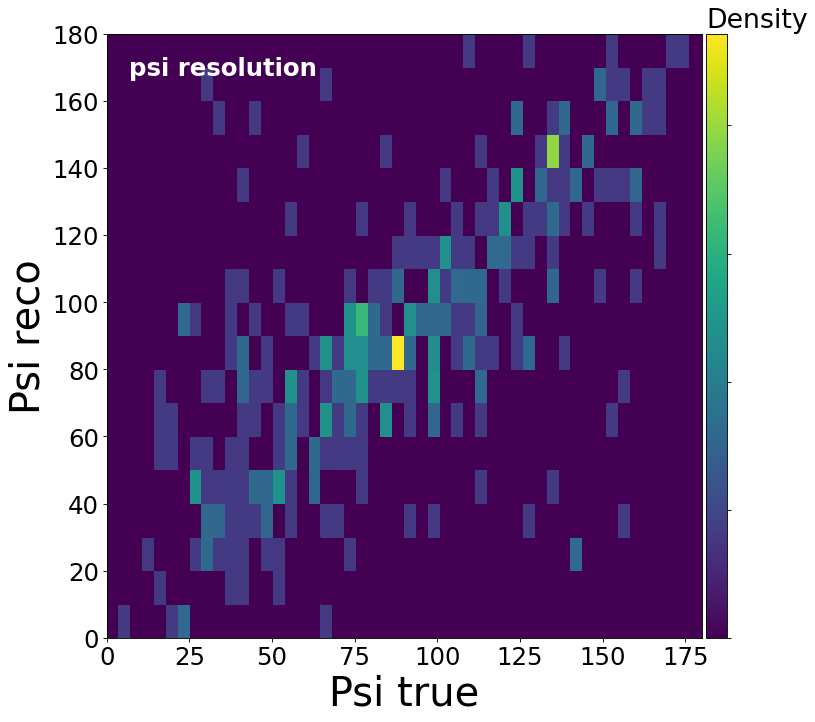

In [13]:
h = Resp['nu_e'][0:50, 50, 0, 0:18, 25]
h.shape

plot_2DHist(h, np.array([Psitrue_edges, Psireco_edges]), "Psi true", "Psi reco", "psi resolution")
# Psitrue_edges.shape


In [14]:
# Compute Response matrix for multiple masses:
masses = [6, 10, 30, 50, 70, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for mass in masses:
    # Binning:
    # E true
    Etrue_center = np.linspace(1., mass, 100)
    Ewidth = (mass-1.)/(100.-1.)
    Etrue_edges = [E - Ewidth/2. for E in Etrue_center]
    Etrue_edges.append(Etrue_center[-1] + Ewidth/2.)
    # Psi true
    Psitrue_edges = np.linspace(0, 180, 51)
    Psiwidth = 180./50.
    Psitrue_center = np.array([Psitrue_edges[i]+Psiwidth/2. for i in range(len(Psitrue_edges)-1)])
    # E reco
    Ereco_edges = pow(10., np.linspace(np.log10(1.), np.log10(1e3), 50+1))
    Ereco_center = np.array([np.sqrt(Ereco_edges[i]*Ereco_edges[i+1]) for i in range(len(Ereco_edges) - 1)])
    # Psi reco
    Psireco_edges = np.linspace(0., 180., 18+1)
    Psireco_center = np.array( [(Psireco_edges[i]+Psireco_edges[i+1])/2. for i in range(len(Psireco_edges)-1)] )

    # PID
    PID_edges = np.array([0.,0.5,0.85,1.])
    PID_center = np.array( [(PID_edges[i]+PID_edges[i+1])/2. for i in range(len(PID_edges)-1)] )

    Bin = GroupBinning(Etrue_edges, Psitrue_edges, Etrue_center, Psitrue_center,
                    Ereco_edges, Psireco_edges, Ereco_center, Psireco_center, PID_edges, PID_center)

    # Response Matrix
    outfile = "./PreComp/ResponseMatrix_mass_{}.pkl".format(mass)
    Resp = MakeResponseMatrix(MCcut, Bin, outfile)
    

# <font color="darkmagenta">Statistics of the samples</font>

In [7]:

nu_types = ["nu_e", "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]
pdg_encoding = {"nu_e":12, "nu_mu":14, "nu_tau":16, "nu_e_bar":-12, "nu_mu_bar":-14, "nu_tau_bar":-16}

for nutype in nu_types:
    print('{}----------------------'.format(nutype))
    loc = np.where( (MCdict['PDG_encoding']==pdg_encoding[nutype]) )
    Nevent = len(MCdict['PDG_encoding'][loc])
    print('N events:{}'.format(Nevent))

    loc = np.where( (MCcut['nutype']==pdg_encoding[nutype]) )
    Nevent = len(MCcut['nutype'][loc])
    print('N events after cut:{}'.format(Nevent))



nu_e----------------------
N events:1293510
N events after cut:928132
nu_mu----------------------
N events:2985094
N events after cut:2130331
nu_tau----------------------
N events:1386302
N events after cut:989845
nu_e_bar----------------------
N events:580606
N events after cut:416887
nu_mu_bar----------------------
N events:1360741
N events after cut:970794
nu_tau_bar----------------------
N events:525138
N events after cut:374741


In [7]:
H = np.histogram2d(MCcut['psi_true'], MCcut['E_true'], bins = (Psireco_edges, Ereco_edges))

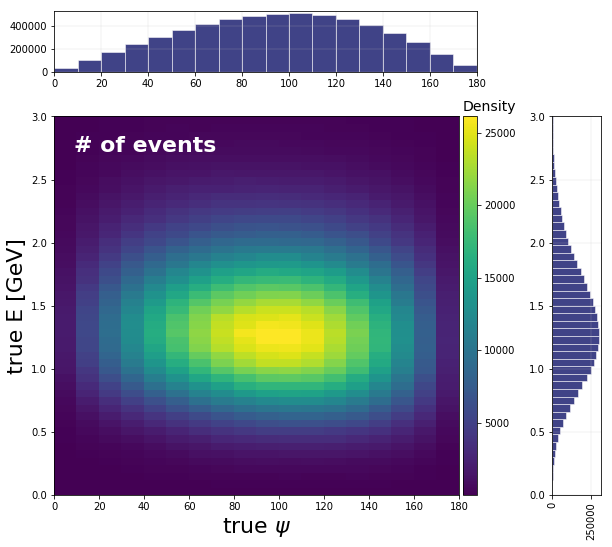

In [10]:
plot_projections(H[0], [Psireco_edges, np.log10(Ereco_edges)], r"true $\psi$", "true E [GeV]", "# of events", zlogscale=False)

In [5]:
MCdict.keys()

dict_keys(['Event_ID', 'MJD_time', 'NEvents', 'PDG_encoding', 'gen_ratio', 'PID', 'NFiles', 'OneWeight', 'AtmWeight', 'AtmFlux_nue', 'AtmFlux_numu', 'true_Energy', 'true_Zenith', 'true_Azimuth', 'true_Dec', 'true_RA', 'true_psi', 'reco_CascadeEnergy', 'reco_TrackEnergy', 'reco_TotalEnergy', 'reco_Zenith', 'reco_Azimuth', 'reco_Dec', 'reco_RA', 'reco_psi', 'L4OscNext_bool', 'L4muon_classifier_all', 'L4noise_classifier', 'L5nHit_DOMs', 'L7OscNext_bool', 'L7muon_classifier_all', 'L7muon_classifier_up', 'L7reco_vertex_z', 'L7reco_vertex_rho36', 'L7_ntop15', 'L7_nouter', 'L7reco_time', 'L7coincident_muon_bool', 'L7data_quality_cut', 'L7containment_cut'])

In [11]:
H = np.histogram2d(np.rad2deg(MCdict['true_psi']), MCdict['true_Energy'], bins = (Psireco_edges, Ereco_edges))

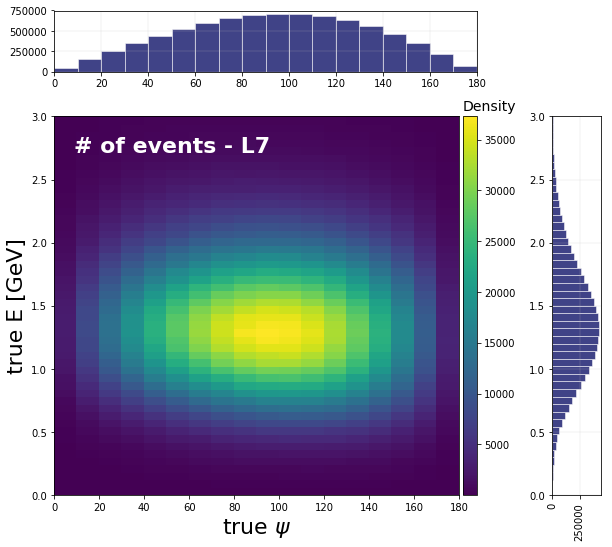

In [12]:
plot_projections(H[0], [Psireco_edges, np.log10(Ereco_edges)], r"true $\psi$", "true E [GeV]", "# of events - L7", zlogscale=False)

BFR sample

In [3]:
# Extract Simulation file:
Sim12 = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sample/Simulation/OscNext_Level7_v02.00_121122_pass2_variables_NoCut.pkl", "rb"))
Sim14 = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sample/Simulation/OscNext_Level7_v02.00_141122_pass2_variables_NoCut.pkl", "rb"))
Sim16 = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sample/Simulation/OscNext_Level7_v02.00_161122_pass2_variables_NoCut.pkl", "rb"))
Sim = [Sim12['121122'], Sim14['141122'], Sim16['161122']]

# L7 selection
MCdict = dict()
for key in Sim12['121122'].keys():
    MCdict[key] = np.array([])
    for s in Sim:
        MCdict[key] = np.concatenate((MCdict[key], s[key]), axis=None) 

# OscNext
Cut = [ApplyCut(Sim12['121122']), ApplyCut(Sim14['141122']), ApplyCut(Sim16['161122'])]
MCcut = dict()
for key in Cut[0].keys():
    MCcut[key] = np.array([])
    for c in Cut:
        MCcut[key] = np.concatenate((MCcut[key], c[key]), axis=None) 

In [4]:

nu_types = ["nu_e", "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]
pdg_encoding = {"nu_e":12, "nu_mu":14, "nu_tau":16, "nu_e_bar":-12, "nu_mu_bar":-14, "nu_tau_bar":-16}

for nutype in nu_types:
    print('{}----------------------'.format(nutype))
    loc = np.where( (MCdict['PDG_encoding']==pdg_encoding[nutype]) )
    Nevent = len(MCdict['PDG_encoding'][loc])
    print('N events:{}'.format(Nevent))

    loc = np.where( (MCcut['nutype']==pdg_encoding[nutype]) )
    Nevent = len(MCcut['nutype'][loc])
    print('N events after cut:{}'.format(Nevent))

nu_e----------------------
N events:1252495
N events after cut:906296
nu_mu----------------------
N events:2957878
N events after cut:2129992
nu_tau----------------------
N events:836573
N events after cut:601989
nu_e_bar----------------------
N events:561245
N events after cut:407281
nu_mu_bar----------------------
N events:1347892
N events after cut:970094
nu_tau_bar----------------------
N events:318522
N events after cut:229409


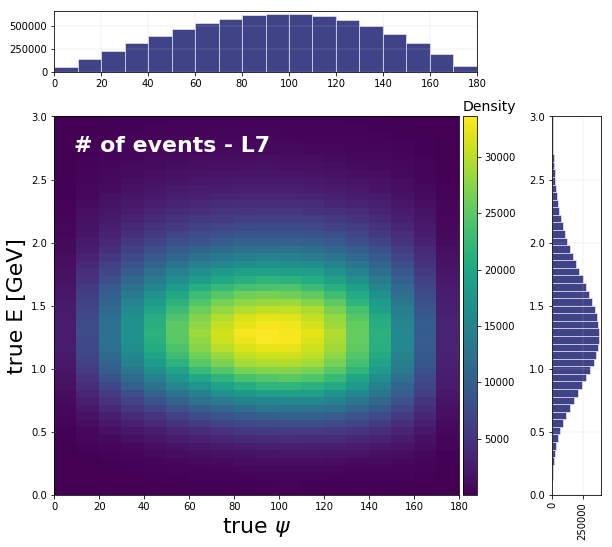

In [7]:
H = np.histogram2d(np.rad2deg(MCdict['true_psi']), MCdict['true_Energy'], bins = (Psireco_edges, Ereco_edges))
plot_projections(H[0], [Psireco_edges, np.log10(Ereco_edges)], r"true $\psi$", "true E [GeV]", "# of events - L7", zlogscale=False)